# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

## Data Inspection

## Data Cleaning

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

## Modelling

Tree Visualization

Accuracy: 0.7744075829383886
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1549
           1       0.63      0.36      0.46       561

    accuracy                           0.77      2110
   macro avg       0.72      0.64      0.66      2110
weighted avg       0.76      0.77      0.75      2110



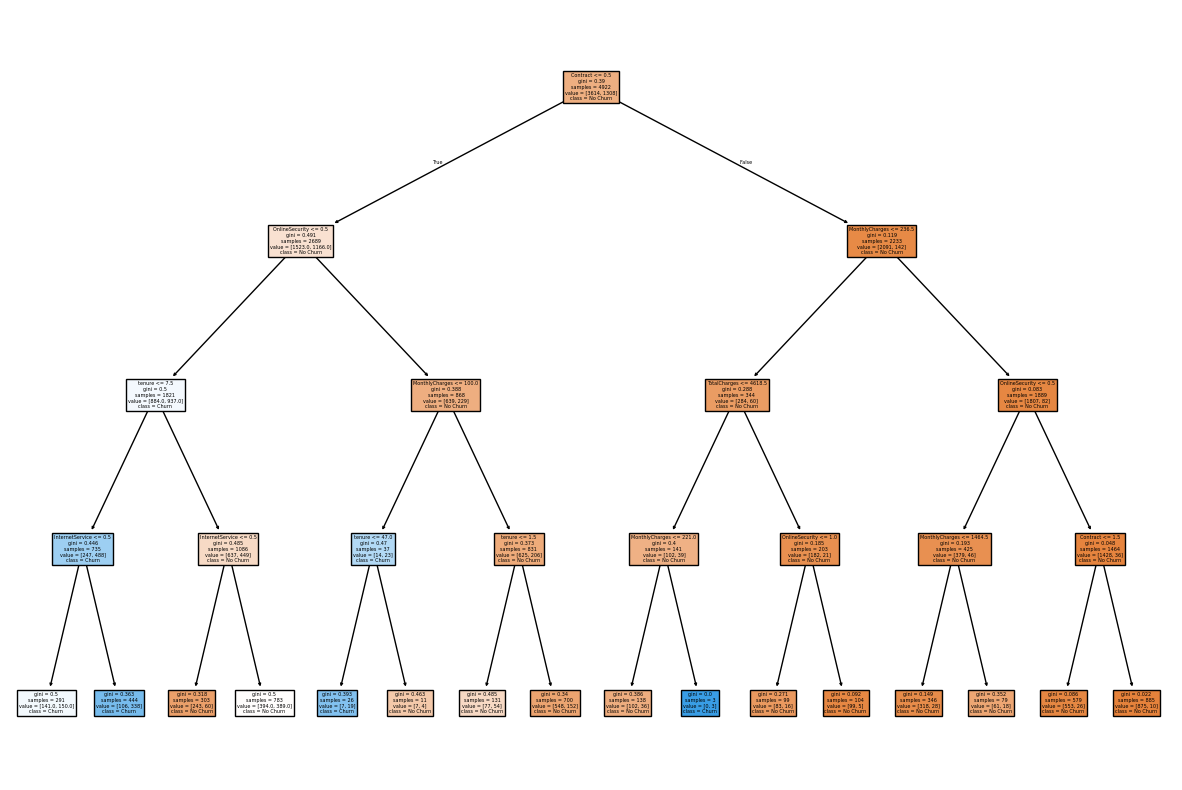

|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= 7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 1
|   |   |--- tenure >  7.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 0
|   |--- OnlineSecurity >  0.50
|   |   |--- MonthlyCharges <= 100.00
|   |   |   |--- tenure <= 47.00
|   |   |   |   |--- class: 1
|   |   |   |--- tenure >  47.00
|   |   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  100.00
|   |   |   |--- tenure <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- tenure >  1.50
|   |   |   |   |--- class: 0
|--- Contract >  0.50
|   |--- MonthlyCharges <= 236.50
|   |   |--- TotalCharges <= 4618.50
|   |   |   |--- MonthlyCharges <= 221.00
|   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  221.00
|   |   |   |   |--- class: 1
|   |   |--

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv")

# Drop irrelevant columns
df = df.drop(columns=['customerID'])

# Convert target column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical variables to numerical using LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']                # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate performance
y_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Visualization of the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

# Display the decision rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


## Evaluation

## Bonus (Optional)